In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data = load_iris()
# Get features and target
X=data.data
y=data.target

y = pd.get_dummies(y).values
print(X)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(130, 4)
(130, 3)
(20, 4)
(20, 3)


In [ ]:
# Initialize variables
learning_rate = 0.1
iterations = 10000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden1_size = 10
hidden2_size = 10

# number of neurons at the output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer1
W1 = np.random.normal(scale=0.5, size=(input_size, hidden1_size))
# initializing weight for the hidden layer2
W2 = np.random.normal(scale=0.5, size=(hidden1_size, hidden2_size))
# initializing weight for the output layer
W3 = np.random.normal(scale=0.5, size=(hidden2_size , output_size))

print(W1)
print(W2)
print(W3)

[[ 0.66579325  0.35763949 -0.77270015 -0.00419192  0.31066799 -0.36004278
   0.13275579  0.05427426  0.00214572 -0.08730011]
 [ 0.21651309  0.60151869 -0.48253284  0.51413704  0.11431507  0.22256881
  -0.56830111  0.06756844  0.7422685  -0.53990244]
 [-0.98886414 -0.87168615  0.13303508  1.19248367  0.56184563  0.83631111
   0.04957461  0.69899819 -0.13562399  0.30660209]
 [-0.13365859 -0.27465451  0.06635415 -0.23807101  0.65423654  0.09750664
   0.20010499 -0.16881617  0.62823613 -0.36598475]]
[[ 0.33011578 -0.17543595 -0.46971668 -0.24466861 -0.40229557 -0.10634882
  -0.16957012  0.15608497  0.28257633 -0.07371013]
 [-0.01295267  0.1445471  -0.26993954  0.35408001  0.42111237  0.1017904
   1.19735183  0.45872947 -0.05613624 -0.18109022]
 [-0.11609113 -0.25086445  0.56439258 -0.34890502 -0.04056109 -0.26464804
   0.52309143 -0.70927801 -0.18124959 -0.06095285]
 [ 0.15967821  0.23045145 -0.10789495  0.49453623  0.15737689  1.23382553
  -0.75416074  0.31030033 -0.52256627 -0.39900441]


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
for itr in range(iterations):

    # feedforward propagation
    # on hidden layer1
    Hin1 = np.dot(X_train, W1) # 130*4  **  4*3 W
    Hout1 = sigmoid(Hin1)

    # on hidden layer2
    Hin2 = np.dot(Hin1, W2) # 130*3  **  3*2  W2
    Hout2 = sigmoid(Hin2)

   # on output layer
    Yin = np.dot(Hout2, W3) # 130*2  **  2*3 W3
    Yout = sigmoid(Yin)


    # Calculating error
    mse = mean_squared_error(Yout, y_train)
    acc = accuracy(Yout, y_train)
    #results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    results.loc[len(results)] = {"mse": mse, "accuracy": acc} # Use loc to add a new row to the DataFrame


    # backpropagation
    W3_part = (Yout - y_train)  * Yout * (1 - Yout)
    W2_part = (np.dot(W3_part, W3.T)) * Hout2 * (1 -  Hout2)
    W1_part = (np.dot(W2_part, W2.T)) * Hout1 * (1 -  Hout1)


    # weight updates
    W3_update = np.dot(Hout2.T,   W3_part) / N
    W2_update = np.dot(Hout1.T,   W2_part) / N
    W1_update = np.dot(X_train.T, W1_part) / N


    W3 = W3 - learning_rate * W3_update
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

<Axes: title={'center': 'Mean Squared Error'}>

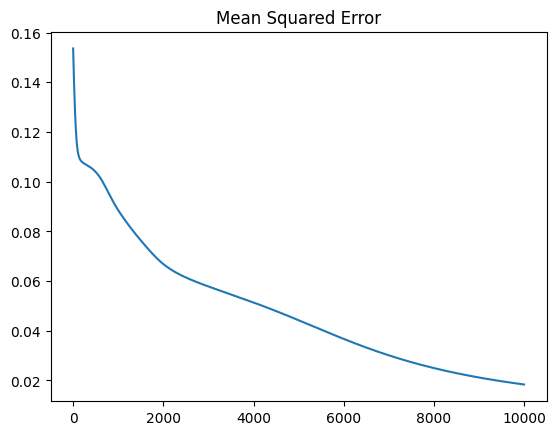

In [ ]:
results.mse.plot(title="Mean Squared Error")
#print(results)


<Axes: title={'center': 'Accuracy'}>

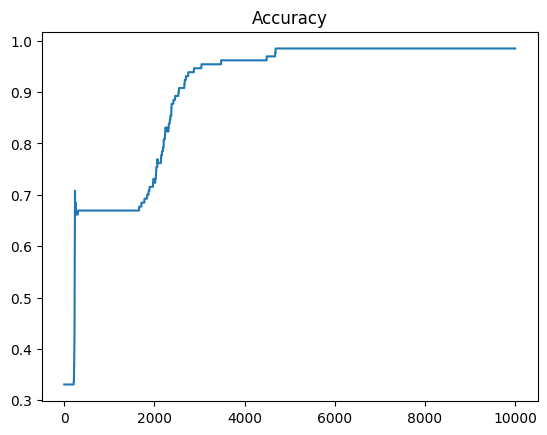

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

Z3 = np.dot(A2, W3)
A3 = sigmoid(Z3)

acc = accuracy(A3, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8
